# House Prices: Advanced Linear Regression Technique

The goal is to predict the sales price for each house in the test data. For each Id in the test set, you must predict the value of the SalePrice variable. 

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train.csv', index_col="Id")
test_data = pd.read_csv('data/test.csv', index_col="Id")

## Data Visualization

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Since we are trying to predict house prices, we look at the SalePrice variable in depth.

In [5]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

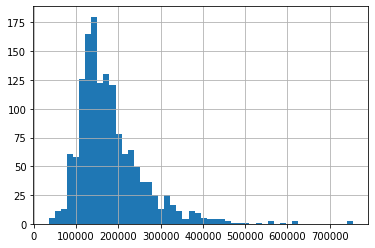

In [6]:
train_data['SalePrice'].hist(bins=50)
plt.show()

From the quantiles and the histogram, we can see that the distribution of *SalePrice* doesn't follow the normal distribution and is heavily right skewed.

To get a more detailed description of the relationship between *SalePrice* and the other variable, we examine the correlation.

In [7]:
corr_matrix = train_data.corr()

print(corr_matrix["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


From the correlation, see that *OverallQual*, *GrLivArea*, *GarageCars*, *GarageArea*, *TotalBsmtSF*, and *1stFlrSF* show correlation greater than 0.6. For each variable we plot a graph to see the relationship between the variables.

### Categorical Variable

Since *OverallQual* is a categorical variable, we plot a boxplot for *SalePrice* against *OverallQual*

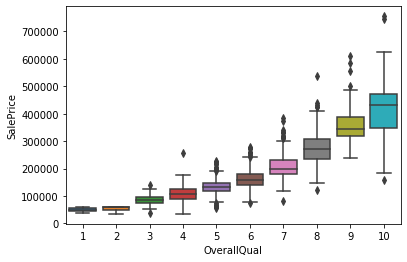

In [8]:
sns.boxplot('OverallQual', 'SalePrice', data = train_data)

### Numerical Variable

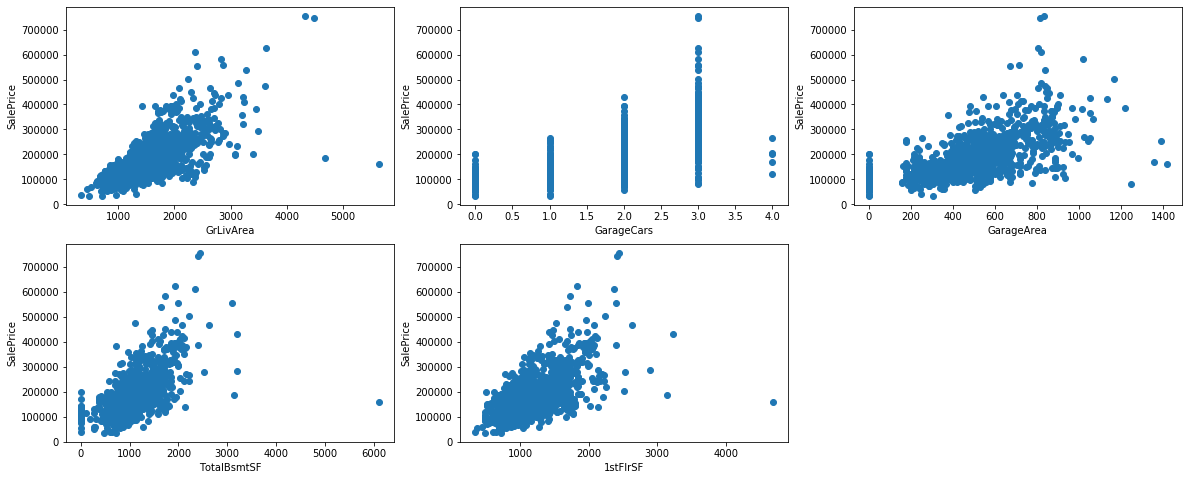

In [9]:
attributes = ['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

plt.figure(figsize = (20, 8))
for i in range(len(attributes)):
    plt.subplot(2, 3, i+1)
    plt.scatter(train_data[attributes[i]], train_data['SalePrice'])
    plt.xlabel(attributes[i])
    plt.ylabel('SalePrice')
plt.show()

From the scatter plots, *GrLivArea* and *1stFirSF* seems to be a better indicator as the *SalePrice* would be very low if these variables are also very low. From *GarageCars*, *GarageArea*, *TotalBsmtSF* we can see that *SalePrice* is not very low even if the variables are equal to 0.

## Preparing the Data

In [10]:
missing_entry_num = train_data.isnull().sum().sort_values(ascending=False)
missing_entry_num.head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

The output shows the columns that have missing features, and the number of rows that are missing. 

From the description of the dataset we can delete *PoolQC*, *MiscFeature*, *Alley*, *Fence*, and *FireplaceQu* since these features are not relevant when purchasing houses.

In [11]:
# drop PoolQC, MiscFeature, Alley, Fence, and FireplaceQU
# drop from both 
train_data = train_data.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"])
test_data = test_data.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"])

In [12]:
missing_entry_num = train_data.isnull().sum().sort_values(ascending=False)
missing_entry_num.head(14)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageCond       81
GarageQual       81
GarageFinish     81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

The columns of the data was broken down into three parts

- Numerical column
- Categorical column processed through OrdinalEncode
- Categorical column processed through OneHotEncoder

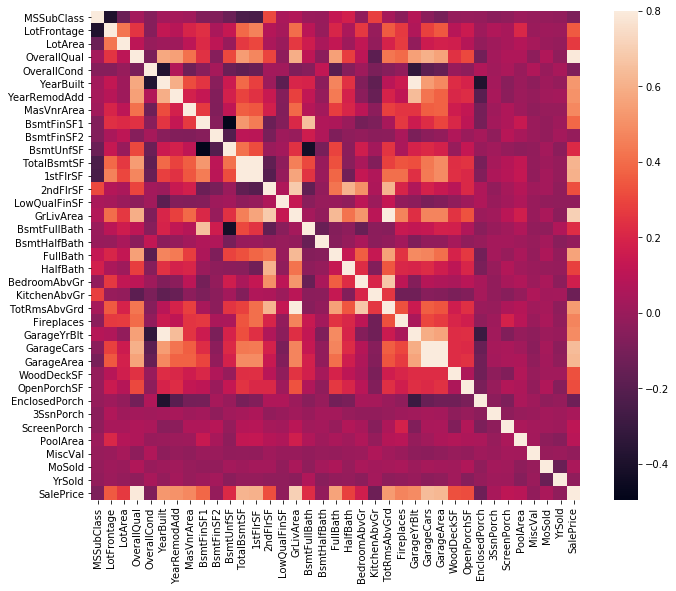

In [153]:
import seaborn as sns

corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

### Numerical Column

In [14]:
# get numerical column
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
housing_num = train_data.select_dtypes(include=numerical)

In [15]:
# drop SalesPrice column because dependent variable
housing_num = housing_num.drop(columns=["SalePrice"])

In [16]:
# drop column that categorical but have numerical data
housing_num = housing_num.drop(columns=['YearBuilt', 'YearRemodAdd', "GarageYrBlt", "MoSold",
                                        "YrSold", "MSSubClass", "OverallQual", "OverallCond"])

### Categorical Column

In [17]:
categorical = ['object']
housing_cat = train_data.select_dtypes(include=categorical)

We fill in the `NaN` values to implement `OrdinalEncoder()` and `OneHotEncoder`

In [18]:
fill_values = {
    'BsmtQual': 'NoB', 'BsmtCond': 'NoB', 'BsmtExposure': 'NoB', 'BsmtFinType1': 'NoB',
    'BsmtFinType2': 'NoB', 'GarageType': 'NoG', 'GarageFinish': 'NoG', 'GarageQual': 'NoG',
    'GarageCond': 'NoG', 'MasVnrType': 'None'
}

for key in fill_values:
    train_data[key] = train_data[key].fillna(value=fill_values[key])

In [19]:
null_val = train_data.isnull().sum().sort_values(ascending=False)
null_val.head(14)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Electrical        1
SalePrice         0
ExterCond         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
Foundation        0
YearRemodAdd      0
BsmtQual          0
dtype: int64

From the output above, we can see that the variables GarageYrBlt and Electrical has 81 and 1 `NaN` values. Since we can not fill years accurately we drop GarageYrBlt. We also remove the one row in which the column of Electrical is `NaN`.

In [20]:
# columns used for OneHotEncoder()
one_hot_cat = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood',
               'Condition1','Condition2', 'BldgType', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
              'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
              'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MoSold',
              'YrSold', 'SaleType']

# columns used for OrdinalEncoder()
ordinal_cat = ['MSSubClass', 'Utilities', 'LotConfig', 'HouseStyle', 'OverallQual', 'OverallCond',
              'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
              'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageQual',
              'GarageCond', 'SaleCondition']

In [21]:
# drop NaN row in Electrical column
drop_row = train_data[train_data['Electrical'].isnull()].index.tolist()[0]
train_data = train_data.drop(1380)

### Transformation Pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [23]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [24]:
full_pipeline = ColumnTransformer([
    ("num_column", num_pipeline, housing_num.columns),
    ("one_hot_column", OneHotEncoder(), one_hot_cat),
    ("ord_column", OrdinalEncoder(), ordinal_cat)
])

In [25]:
housing_prepared = full_pipeline.fit_transform(train_data)

# Selecting and Training Model

In [40]:
# change sparse matrix (housing_prepared) into dataframe
transformed_train = pd.DataFrame.sparse.from_spmatrix(housing_prepared)

# increase index by 1 to match with SalePrice Column
transformed_train.index = range(1,len(transformed_train)+1)

# add Saleprice column to transformed_train
transformed_train['SalePrice'] = train_data[['SalePrice']]
transformed_train.head()

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,SalePrice
1,-0.220703,-0.207125,0.513594,0.574748,-0.28876,-0.944607,-0.460570,-0.794191,1.162093,-0.120284,...,3.0,2.0,6.0,0.0,2.0,6.0,5.0,5.0,4.0,208500.0
2,0.460263,-0.091909,-0.571009,1.171304,-0.28876,-0.641330,0.465629,0.256426,-0.794554,-0.120284,...,1.0,0.0,6.0,0.0,3.0,6.0,5.0,5.0,4.0,181500.0
3,-0.084510,0.073401,0.325449,0.092239,-0.28876,-0.301842,-0.314568,-0.628576,1.189587,-0.120284,...,2.0,2.0,6.0,0.0,2.0,6.0,5.0,5.0,4.0,223500.0
4,-0.447692,-0.096918,-0.571009,-0.499931,-0.28876,-0.061936,-0.688698,-0.522480,0.937560,-0.120284,...,3.0,0.0,6.0,2.0,2.0,6.0,5.0,5.0,0.0,140000.0
5,0.641854,0.374967,1.365783,0.462893,-0.28876,-0.175099,0.198720,-0.046338,1.618033,-0.120284,...,0.0,2.0,6.0,0.0,2.0,6.0,5.0,5.0,4.0,250000.0


In [78]:
# shuffle the data
transformed_train = transformed_train.sample(frac=1).reset_index(drop=True)
transformed_train.head()

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,SalePrice
0,0.778047,0.062982,0.812413,-0.973668,-0.28876,2.583812,1.485361,1.433842,-0.794554,-0.120284,...,0.0,6.0,6.0,0.0,2.0,6.0,5.0,5.0,4.0,255500.0
1,1.005036,-0.039811,1.592664,0.649317,-0.28876,-0.322211,0.244345,0.103750,2.236645,-0.120284,...,3.0,2.0,6.0,0.0,2.0,6.0,5.0,5.0,4.0,290000.0
2,-0.129908,0.013890,0.945222,-0.973668,-0.28876,2.423121,1.323390,1.250113,-0.794554,-0.120284,...,0.0,6.0,6.0,0.0,2.0,6.0,5.0,5.0,5.0,248900.0
3,0.006285,-0.142003,-0.571009,-0.921030,-0.28876,2.871246,1.829834,1.741781,-0.794554,-0.120284,...,3.0,2.0,6.0,0.0,2.0,6.0,5.0,5.0,4.0,216837.0
4,-0.084510,-0.268440,-0.571009,0.712921,-0.28876,-1.069086,-0.442319,-0.680331,-0.794554,-0.120284,...,0.0,0.0,6.0,4.0,3.0,6.0,5.0,5.0,4.0,124000.0


We split the data into training data and validation data. 

In [115]:
X_train = transformed_train.loc[:, transformed_train.columns != 'SalePrice'][:312]
y_train = transformed_train['SalePrice'][:312]

X_valid = transformed_train.loc[:, transformed_train.columns != 'SalePrice'][312:]
y_valid = transformed_train['SalePrice'][312:].to_numpy()

y_valid[581] = 169000.0

In [183]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA

We use dimension reduction to make the dataset smaller.

In [170]:
X_train_reduced = PCA(n_components=11).fit_transform(X_train)
X_valid_reduced = PCA(n_components=11).fit_transform(X_valid)

In [180]:
def cross_val(algo, predictor = X_train_reduced, label = y_train, X_valid = X_valid_reduced, y_valid = y_valid):
    model = algo
    fitted_model = model.fit(predictor, label)
    predicted_value = fitted_model.predict(X_valid)
    log_predicted_value = np.log(predicted_value)
    log_y_valid = np.log(y_valid)
    score = mean_squared_error(log_y_valid, log_predicted_value, )
    return np.sqrt(score)

In [188]:
print("Linear Regression", cross_val(LinearRegression()))
print("Lasso", cross_val(Lasso()))
print("Ridge", cross_val(Ridge()))
print("Random Forest", cross_val(RandomForestRegressor()))
print("Support Vector Machine", cross_val(LinearSVR()))

Linear Regression 0.2581958297063
Lasso 0.25819160374307415
Ridge 0.2580506063072537
Random Forest 0.26276035245158236
Support Vector Machine 6.2908878547981955


From the root mean squared values printed above, we can see that the Lasso Regression model returns the smallest value. 

## Fine-Tuning the Model

In [189]:
from sklearn.model_selection import GridSearchCV

We use GridSearchCV to find the best possible set of parameters that returns the smallest error.

In [191]:
param_grid = [
    {'alpha': [0.1, 0.5, 1.5, 2], 'tol': [1e-2, 1e-4, 1e-6]}
]

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_log_error',
                          return_train_score=True)

grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.1, 0.5, 1.5, 2],
                          'tol': [0.01, 0.0001, 1e-06]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_log_error', verbose=0)

In [192]:
# get params that return best result
grid_search.best_params_

{'alpha': 2, 'tol': 0.01}

In [198]:
predict = grid_search.best_estimator_.predict(X_valid_reduced)

def log_rmse(predict, true = y_valid):
    """
    get root mean squared error of log(predict) and log(true)
    """
    mse = mean_squared_error(np.log(y_valid), np.log(predict))
    return np.sqrt(mse)

print("Log RMSE:", log_rmse(predict))

Log RMSE: 0.2581873785627286


Since the best parameters were values that was the maximum for `alpha` and `tol` we check further to see if there are better parameters.

In [216]:
lasso = Lasso()


param_grid1 = [
    {'alpha': [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 10], 'tol': [0.01, 0.1, 0.5, 1]}
]

grid_search1 = GridSearchCV(lasso, param_grid1, cv=5, scoring='neg_mean_squared_log_error',
                          return_train_score=True)

param_grid2 = [
    {'alpha': [10, 100], 'tol': [0.01, 0.1, 0.5, 1]}
]

grid_search2 = GridSearchCV(lasso, param_grid2, cv=5, scoring='neg_mean_squared_log_error',
                          return_train_score=True)

grid_search1.fit(X_train_reduced, y_train)
grid_search2.fit(X_train_reduced, y_train)

print("grid_search1:", grid_search1.best_params_)
print("grid_search2:", grid_search2.best_params_)

grid_search1: {'alpha': 10, 'tol': 0.5}
grid_search2: {'alpha': 100, 'tol': 0.1}


From the output above, `grid_search_1` and `grid_search_2` returns different parameters. We get root mean squared error to see which parameters gives a more accurate prediction.

In [217]:
predict1 = grid_search1.best_estimator_.predict(X_valid_reduced)
predict2 = grid_search2.best_estimator_.predict(X_valid_reduced)

In [218]:
print('Grid search 1:', log_rmse(predict1))
print('Grid search 2:', log_rmse(predict2))

Grid search 1: 0.2581536053022907
Grid search 2: 0.2577526731788426


From the root mean squared value, we see that `grid_search_2` is a better model.

## Predicting using test data

In [219]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [225]:
test_data['SalePrice'] = [0 for x in range(1459)]
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,0
1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,0
1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,0
1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,0
1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,0


In [231]:
null_val = test_data.isnull().sum().sort_values(ascending=False)
null_val.head(30)

LotFrontage     227
GarageQual       78
GarageYrBlt      78
GarageFinish     78
GarageCond       78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType2     42
BsmtFinType1     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Utilities         2
KitchenQual       1
Exterior2nd       1
TotalBsmtSF       1
GarageArea        1
BsmtUnfSF         1
GarageCars        1
BsmtFinSF2        1
BsmtFinSF1        1
SaleType          1
Exterior1st       1
SalePrice         0
RoofStyle         0
dtype: int64

In [ ]:
fill_values = {
    'BsmtQual': 'NoB', 'BsmtCond': 'NoB', 'BsmtExposure': 'NoB', 'BsmtFinType1': 'NoB',
    'BsmtFinType2': 'NoB', 'GarageType': 'NoG', 'GarageFinish': 'NoG', 'GarageQual': 'NoG',
    'GarageCond': 'NoG', 'MasVnrType': 'None'
}

for key in fill_values:
    train_data[key] = train_data[key].fillna(value=fill_values[key])